In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import missingno as msno 

dashes = dashes='---'*20

In [30]:
"""
amount_tsh : Total static head (amount water available to waterpoint)
date_recorded : The date the row was entered
funder : Who funded the well
gps_height : Altitude of the well
installer : Organization that installed the well
longitude : GPS coordinate
latitude : GPS coordinate
wpt_name : Name of the waterpoint if there is one
num_private :Private use or not
basin : Geographic water basin
subvillage : Geographic location
region : Geographic location
region_code : Geographic location (coded)
district_code : Geographic location (coded)
lga : Geographic location
ward : Geographic location
population : Population around the well
public_meeting : True/False
recorded_by : Group entering this row of data
scheme_management : Who operates the waterpoint
scheme_name : Who operates the waterpoint
permit : If the waterpoint is permitted
construction_year : Year the waterpoint was constructed
extraction_type : The kind of extraction the waterpoint uses
extraction_type_group : The kind of extraction the waterpoint uses
extraction_type_class : The kind of extraction the waterpoint uses
management : How the waterpoint is managed
management_group : How the waterpoint is managed
payment : What the water costs
payment_type : What the water costs
water_quality : The quality of the water
quality_group : The quality of the water
quantity : The quantity of water
quantity_group : The quantity of water
source : The source of the water
source_type : The source of the water
source_class : The source of the water
waterpoint_type : The kind of waterpoint
waterpoint_type_group : The kind of waterpoint"""



#pd.set_option('display.max_columns', None)  
df = pd.read_csv('data/water_table.csv')
labels = pd.read_csv('data/water_table_labels.csv')

In [31]:
labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [32]:
df['target']= labels['status_group']

In [33]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [34]:
#convert sex column to binary encoding
#dictionary t oreplace values
df['target'] = df['target'].map({'functional':0,'non functional':1,'functional needs repair':2})
df.head()
df.drop('id',axis=1, inplace=True)

In [35]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0


#### Data Visualization

0    32259
1    22824
2     4317
Name: target, dtype: int64


0    0.543
1    0.384
2    0.073
Name: target, dtype: float64
---------------------------------------------


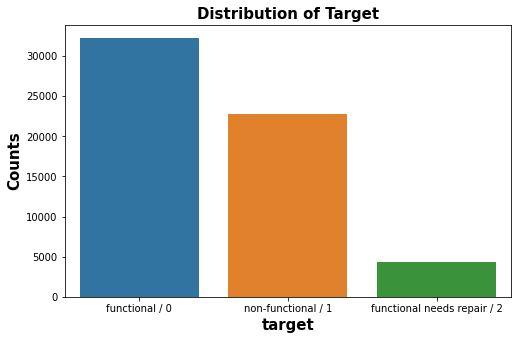

In [36]:
def feature_distribution(data, col = None,ticklabels=None, figsize=None):
    """
    plots a seaborn distplot for column w/customization
    Args
    df (df)
    col (int)
    hist_kws (dict)
    figsize (dict)
    
    """
    print(data[col].value_counts(dropna=False))
    print('\n')
    print(round(data[col].value_counts(normalize=True),3))
    dashes = dashes='---'*15
    print(dashes)
    
#     if hist_kws == None:
#         {'alpha':0.5,'edgecolor':'black'}

    #order = pd.crosstab(data[col].sort_values('Classic', ascending=False).index

    fig,ax = plt.subplots(figsize=figsize)
    sns.countplot(data[col], ax=ax)

    label_font = {'weight':'bold','size':15}
    ax.set_ylabel('Counts',fontdict=label_font)
    ax.set_xlabel(col,fontdict=label_font)
    ax.set_title(f'Distribution of {col.title()}',fontdict=label_font)
    ax.set_xticklabels(ticklabels)

feature_distribution(df, col='target', ticklabels=['functional / 0','non-functional / 1','functional needs repair / 2'],figsize=(8,5))

#### unique Values

In [37]:
def unique_values(df):
    info_df = df.info()
    print(dashes)
    print('\n')
    num_unique = df.nunique()
    print("Number of uniques values in each Feature/Column:")
    
    return num_unique

unique_values(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null object


amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity

#### Null Values

In [38]:
def nan_more_fifty(df): 
    for column in df:
        if df[column].isnull().sum()*100.0/df.shape[0] > 50:
            df.drop(column,1, inplace=True)
        #else:
    print('There are no columns with 50% or more null values')
    return df        

In [39]:
more_fifty = nan_more_fifty(df)

There are no columns with 50% or more null values


Index(['funder', 'installer', 'subvillage', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit'],
      dtype='object')
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 7 columns):
funder               55765 non-null object
installer            55745 non-null object
subvillage           59029 non-null object
public_meeting       56066 non-null object
scheme_management    55523 non-null object
scheme_name          31234 non-null object
permit               56344 non-null object
dtypes: object(7)
memory usage: 3.2+ MB


(funder                3635
 installer             3655
 subvillage             371
 public_meeting        3334
 scheme_management     3877
 scheme_name          28166
 permit                3056
 dtype: int64,
 None)

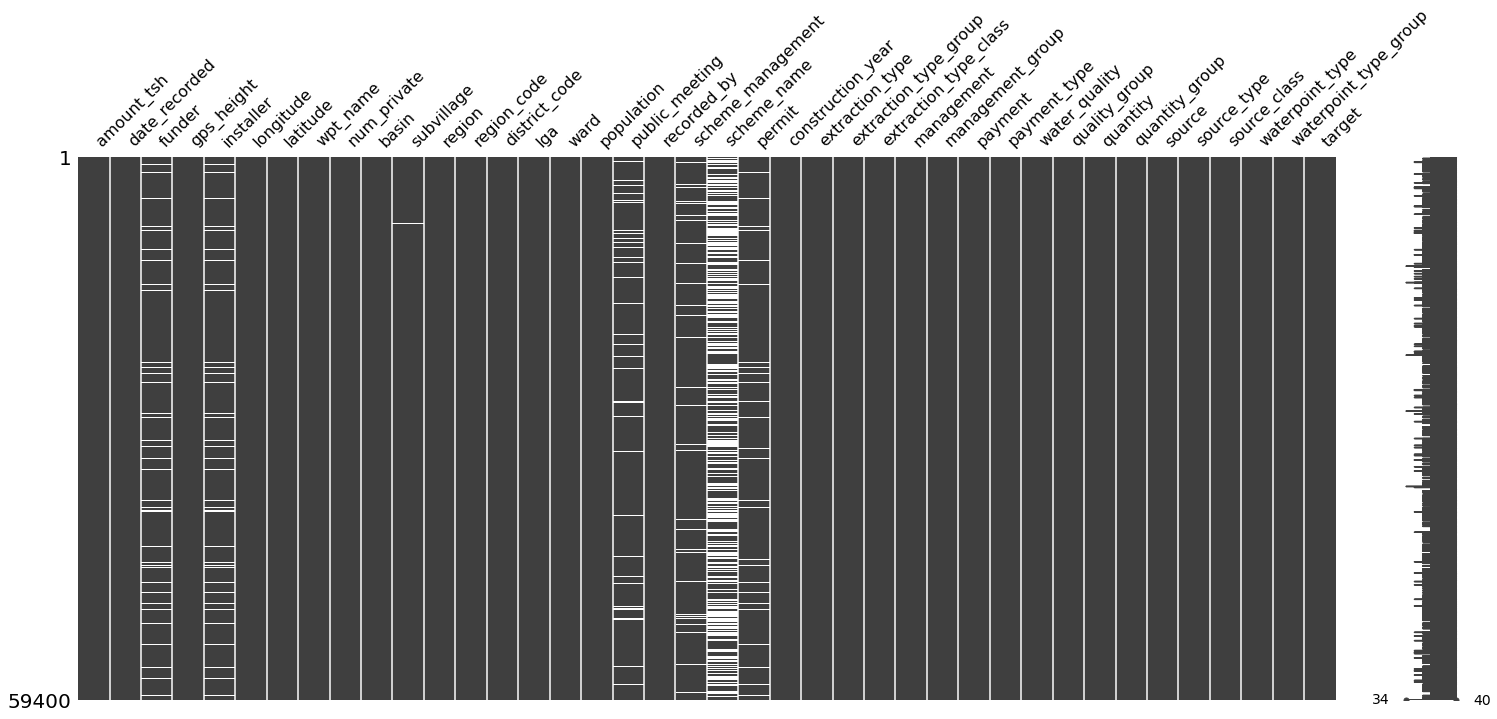

In [40]:
def count_null(df):
    #only features w/null values
    null_columns=df.columns[df.isnull().any()]
    test = df[null_columns].isnull().sum()
    if test.empty:
        print('No Features have NaN values.')
    else:
        print(null_columns)
        print(dashes)
    
    # Visualize missing values as a matrix 
    msno.matrix(df) 
    
    return test, df[null_columns].info()
    
count_null(df)  

#### Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
y = df['target'].copy()
X = df.drop('target',axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44550, 39)
(44550,)
(14850, 39)
(14850,)


#### Addresss NaN Values

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
def remake(X_train_cln,X_train):
       return pd.DataFrame(X_train_cln,columns=X_train.columns, index=X_train.index)

def impute(X_train, X_test):
    imputer = SimpleImputer(strategy='most_frequent')
    X_train_cln = remake(imputer.fit_transform(X_train), X_train) #remake function
    X_test_cln = remake(imputer.transform(X_test ), X_test)
    X_test_cln
    #X_train_cln = X_train_cln.astype(float)
    #X_test_cln = X_test_cln.astype(float)
    
    return X_train_cln, X_test_cln

In [47]:
X_train_cln, X_test_cln = impute(X_train,X_test)
X_train_cln

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
24947,20,2011-03-08,Government Of Tanzania,330,Ce,38.1238,-6.08714,Ccm,0,Wami / Ruvu,...,per bucket,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
22630,0,2013-02-16,Dwsp,0,DWE,0,-2e-08,Mwamahonza,0,Lake Victoria,...,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
13789,0,2011-08-13,Dasip,0,DASIP,33.3123,-2.8141,Chanongu,0,Lake Victoria,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
15697,0,2013-01-20,Government Of Tanzania,1542,GOVERNMENT,34.783,-4.84209,Zahanati,0,Internal,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
22613,0,2013-09-03,World Bank,523,Government,34.6609,-10.7073,Kwa Mzee Charles,0,Lake Nyasa,...,unknown,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,1000,2011-03-20,Dhv,327,DWE,36.3671,-8.77476,Kwa Mbayambaya,0,Rufiji,...,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
38158,1000,2011-03-10,Danida,1743,DANID,34.5315,-9.7696,none,0,Lake Nyasa,...,annually,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe
860,0,2011-03-13,Omar Ally,-13,Omar Ally,38.9744,-5.42082,Kwa Omar Ally,0,Pangani,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other
15795,0,2012-10-31,Rwssp,0,WEDECO,34.3166,-3.10716,Muungano,0,Lake Victoria,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


No Features have NaN values.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 24947 to 56422
Empty DataFrame(Series([], dtype: float64), None)
------------------------------------------------------------
No Features have NaN values.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 2980 to 1888
Empty DataFrame(Series([], dtype: float64), None)


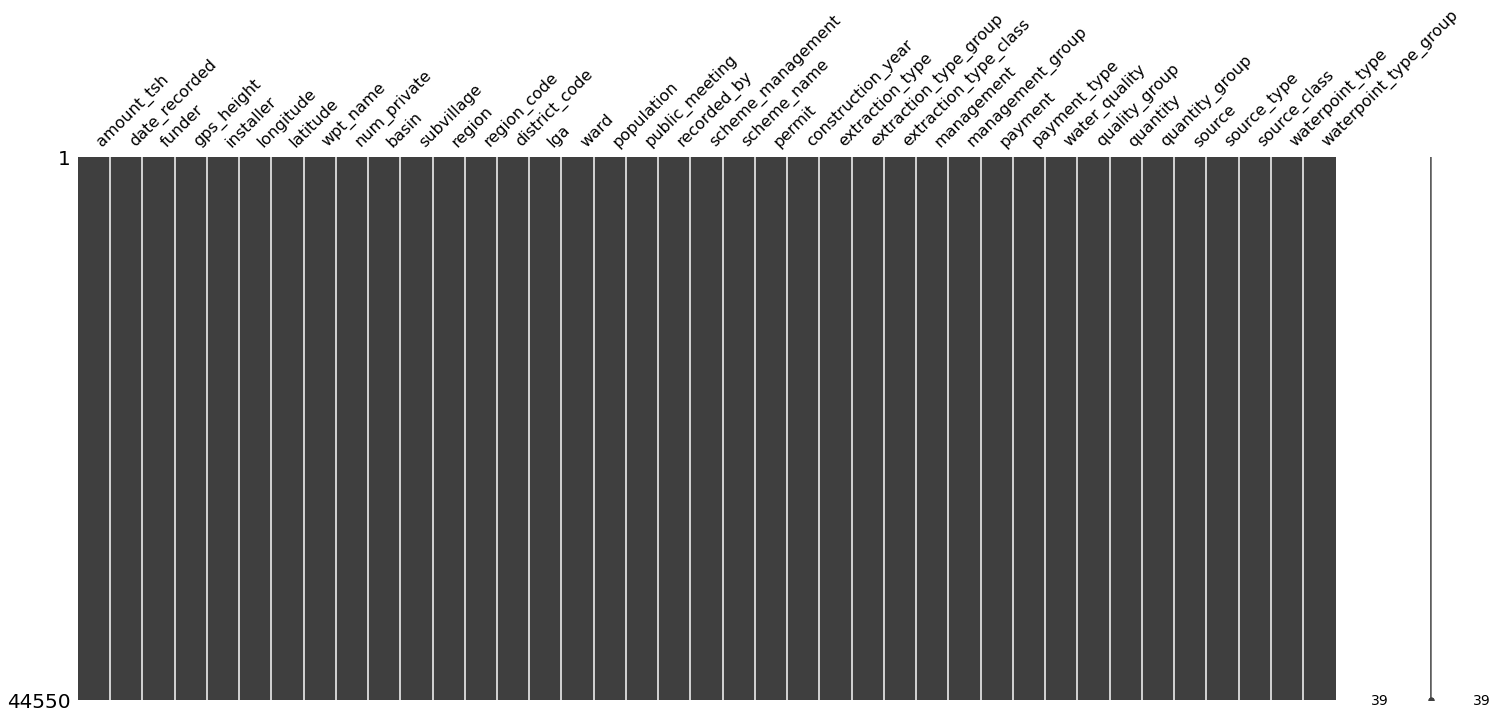

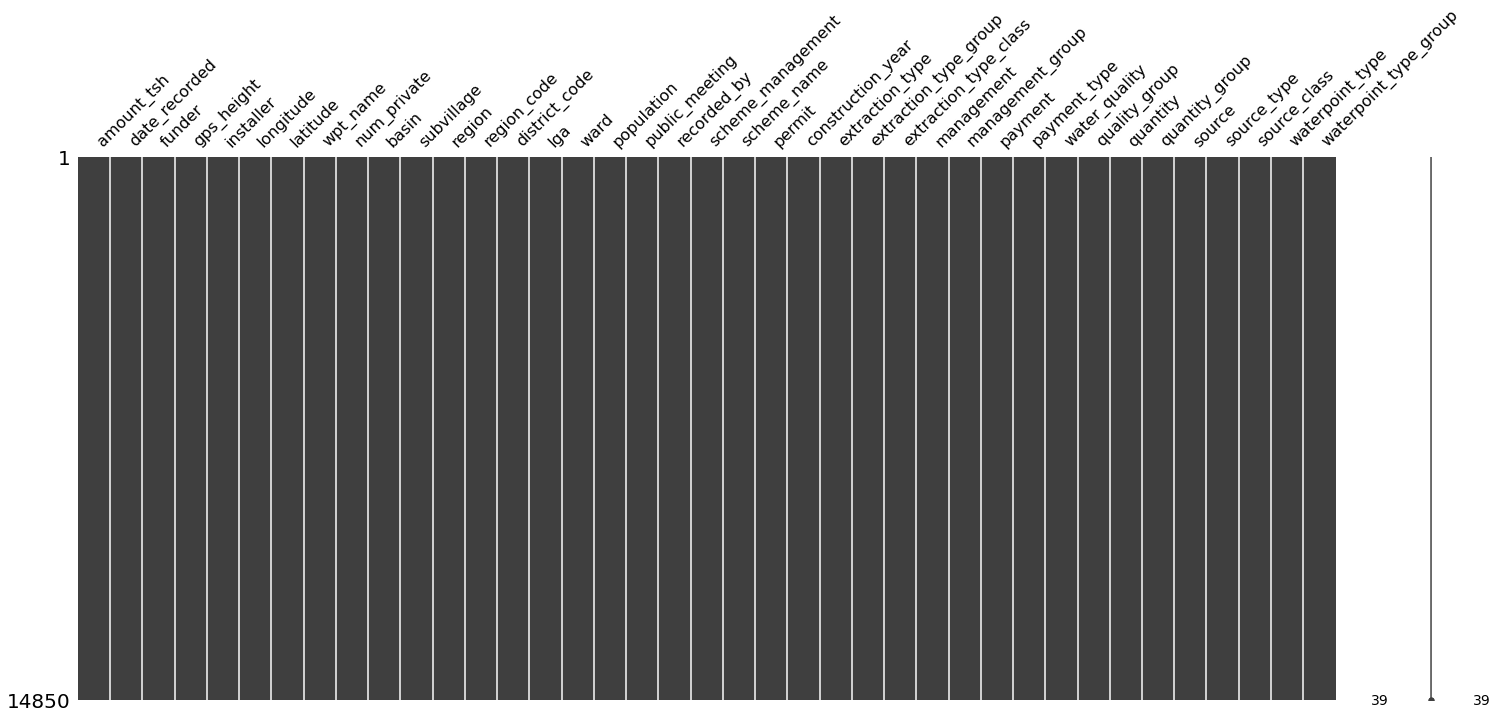

In [48]:
print(count_null(X_train_cln))
print(dashes)
print(count_null(X_test_cln))

#### One Hot Encode Categoricals

In [49]:
X_train_c = X_train_cln.copy()
X_test_c = X_test_cln.copy()

In [50]:
X_train_c.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [51]:
cat_cols = X_train_c.select_dtypes('O')
cat_cols

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
24947,20,2011-03-08,Government Of Tanzania,330,Ce,38.1238,-6.08714,Ccm,0,Wami / Ruvu,...,per bucket,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
22630,0,2013-02-16,Dwsp,0,DWE,0,-2e-08,Mwamahonza,0,Lake Victoria,...,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
13789,0,2011-08-13,Dasip,0,DASIP,33.3123,-2.8141,Chanongu,0,Lake Victoria,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
15697,0,2013-01-20,Government Of Tanzania,1542,GOVERNMENT,34.783,-4.84209,Zahanati,0,Internal,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
22613,0,2013-09-03,World Bank,523,Government,34.6609,-10.7073,Kwa Mzee Charles,0,Lake Nyasa,...,unknown,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,1000,2011-03-20,Dhv,327,DWE,36.3671,-8.77476,Kwa Mbayambaya,0,Rufiji,...,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
38158,1000,2011-03-10,Danida,1743,DANID,34.5315,-9.7696,none,0,Lake Nyasa,...,annually,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe
860,0,2011-03-13,Omar Ally,-13,Omar Ally,38.9744,-5.42082,Kwa Omar Ally,0,Pangani,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other
15795,0,2012-10-31,Rwssp,0,WEDECO,34.3166,-3.10716,Muungano,0,Lake Victoria,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [52]:
cat_cols.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [53]:
cols_hot = ['amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group']
def one_hot(df_train, df_test, columns=cols_hot):
    one_hot_train = pd.get_dummies(df_train, columns=cols_hot, drop_first=True)
    one_hot_test = pd.get_dummies(df_test, columns=cols_hot, drop_first=True)
    
    return one_hot_train, one_hot_test

In [54]:
one_hot_train_cl, one_hot_test_cl = one_hot(X_train_c, X_test_c, cols_hot)

In [55]:
print(one_hot_train_cl.shape)
print(one_hot_test_cl.shape)

(44550, 144366)
(14850, 57180)


In [56]:
one_hot_train_cl.head(5)

,amount_tsh_0.2,amount_tsh_0.25,amount_tsh_1.0,amount_tsh_2.0,amount_tsh_5.0,amount_tsh_6.0,amount_tsh_7.0,amount_tsh_9.0,amount_tsh_10.0,amount_tsh_12.0,...,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
24947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
22630,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
13789,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
15697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
22613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
